<a href="https://colab.research.google.com/github/Ahmed-Shatla/YaleB_Full_V2_CNN/blob/main/Yale_V2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [2]:
path1 = '/content/drive/MyDrive/Faces data/FullImage/yaleB13'
path2 = '/content/drive/MyDrive/Faces data/FullImage/yaleB15'
path3 = '/content/drive/MyDrive/Faces data/FullImage/yaleB16'
path4 = '/content/drive/MyDrive/Faces data/FullImage/yaleB28'
path5 = '/content/drive/MyDrive/Faces data/FullImage/yaleB37'

In [3]:
images = []
label = []


B13 = []
lB13 = []

B15 = []
lB15 = []

B16 = []
lB16 = []

B28 = []
lB28 = []

B37 = []
lB37 = []


for img in os.listdir(path1):
  if '.pgm' in img:
    image = cv2.imread(path1+'/'+img)
    B13.append(image[:310,230:520])
    lB13.append('yaleB13')

for img in os.listdir(path2):
  if '.pgm' in img:
    image = cv2.imread(path2+'/'+img)
    B15.append(image[100:400,190:450])
    lB15.append('yaleB15')

for img in os.listdir(path3):
  if '.pgm' in img:
    image = cv2.imread(path3+'/'+img)
    B16.append(image[50:350,240:500])
    lB16.append('yaleB16')


for img in os.listdir(path4):
  if '.pgm' in img:
    image = cv2.imread(path4+'/'+img)
    B28.append(image[140:420,250:455])
    lB28.append('yaleB28')



for img in os.listdir(path5):
  if '.pgm' in img:
    image = cv2.imread(path5+'/'+img)
    B37.append(image[50:360,270:530])
    lB37.append('yaleB37')

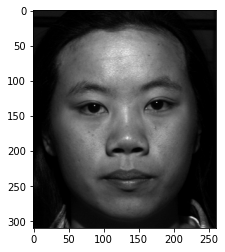

In [4]:
plt.imshow(cv2.cvtColor(B37[1],cv2.COLOR_BGR2RGB))

In [5]:
##shuffle

for i in range(0,585):
  images.append(B13[i])
  label.append(lB13[i])

  images.append(B15[i])
  label.append(lB15[i])

  images.append(B16[i])
  label.append(lB16[i])

  images.append(B28[i])
  label.append(lB28[i])

  images.append(B37[i])
  label.append(lB37[i])

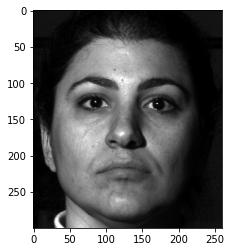

In [6]:
plt.imshow(cv2.cvtColor(images[56],cv2.COLOR_BGR2RGB))

In [7]:
images = np.array(images)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [8]:
images.shape

(2925,)

In [9]:
h = []
w = []
for image in images:
  h.append(image.shape[0])
  w.append(image.shape[1])
print('avg shape : '+str(int(np.mean(h)))+","+str(int(np.mean(w))))

avg shape : 300,255


In [10]:
def reshape_images(images):
  reshaped_img = []
  for image in images:
    reshaped_img.append(cv2.resize(image,(255,300)))
  return reshaped_img
images = reshape_images(images)

In [11]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
labels = lb.fit_transform(label)

In [12]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(labels)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images,y,test_size=0.2)

X_train = np.array(X_train)
X_test = np.array(X_test)



In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
trainGenerator = ImageDataGenerator(zoom_range=0.1,rotation_range=10,horizontal_flip=True)
testGenerator = ImageDataGenerator()


In [16]:
train = trainGenerator.flow(X_train,y_train,batch_size=8)
test = testGenerator.flow(X_test,y_test,batch_size=8)

In [17]:
from tensorflow.keras.applications import VGG16
vgg_model = VGG16(include_top=False,input_shape=(300,255,3),weights='imagenet')
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 255, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 255, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 255, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 127, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 63, 128)       0     

In [18]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Model

for layer in vgg_model.layers:
  layer.trainable = False

In [19]:
my_model = vgg_model.output

my_model = Flatten()(my_model)


my_model = Dense(1024,activation='relu')(my_model)
my_model = Dense(512,activation='relu')(my_model)
my_model = Dense(256,activation='relu')(my_model)
my_model = Dense(128,activation='relu')(my_model)
my_model = Dense(64,activation='relu')(my_model)



my_model = Dense(5,activation='softmax')(my_model)



In [20]:
model = Model(vgg_model.input,my_model)

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 255, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 255, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 255, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 127, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 63, 128)       0     

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [23]:
history = model.fit_generator(train,validation_data=test,steps_per_epoch=32,epochs=5,verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
32/32 [==============================] - 656s 21s/step - loss: 6.0962 - accuracy: 0.3789 - val_loss: 1.0678 - val_accuracy: 0.7282
Epoch 2/5
32/32 [==============================] - 660s 21s/step - loss: 1.2887 - accuracy: 0.7063 - val_loss: 0.5802 - val_accuracy: 0.8342
Epoch 3/5
32/32 [==============================] - 652s 21s/step - loss: 1.0340 - accuracy: 0.7461 - val_loss: 0.2582 - val_accuracy: 0.9197
Epoch 4/5
32/32 [==============================] - 650s 21s/step - loss: 0.2734 - accuracy: 0.9023 - val_loss: 0.2314 - val_accuracy: 0.9162
Epoch 5/5
32/32 [==============================] - 645s 21s/step - loss: 0.3094 - accuracy: 0.9102 - val_loss: 0.2722 - val_accuracy: 0.9009
